In [0]:
import sklearn.metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score #The F-Measure is a popular metric for imbalanced classification.
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

In [0]:
# Import packages

import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


import gc #Garbage Collector interface
from datetime import datetime 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder

In [3]:
# import Google Drive 套件
from google.colab import drive

# 將自己的雲端硬碟掛載上去
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# 透過 gdrive/My Drive/... 來存取檔案
data_df = pd.read_csv('gdrive/My Drive/TEJ_Whole_year_Jieba.csv')

In [98]:
data_df.head()

,個股代號,公司簡稱,事件日,TCRI(年/月),事件強度,大事件類別,小事件類別,事件內容,content_tokenized
0,1218,泰山,20190101,6(2018/09),0,M_經營層,MT06_高管異動,發言人林俐婉內部調動，由江巍峰接任。。,發言 人 林俐婉 內部 調動 由 江巍峰 接任
1,1503,士電,20190101,4(2018/09),0,M_經營層,MT06_高管異動,內部稽核主管林志強內部調動，由莊文清接任。。,內部 稽核 主管 林志強 內部 調動 由 莊文清 接任
2,1504,東元,20190101,4(2018/09),0,M_經營層,MT06_高管異動,會計主管藍俊雄內部調動，由林鴻名接任。。,會計 主管 藍俊雄 內部 調動 由 林鴻名 接任
3,1709,和益,20190101,5(2018/09),0,M_經營層,MT06_高管異動,內部稽核主管游本詮內部調動，由曾筱茜接任。。,內部 稽核 主管 游本 詮內部 調動 由 曾筱茜 接任
4,1721,三晃,20190101,7(2018/09),0,M_經營層,MT06_高管異動,財務經理洪廷宜內部調動，由王婷渝接任。。,財務 經理 洪廷宜 內部 調動 由 王婷渝 接任


In [99]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23703 entries, 0 to 23702
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   個股代號               23703 non-null  int64 
 1   公司簡稱               22775 non-null  object
 2   事件日                23703 non-null  int64 
 3   TCRI(年/月)          23703 non-null  object
 4   事件強度               23703 non-null  int64 
 5   大事件類別              23703 non-null  object
 6   小事件類別              23703 non-null  object
 7   事件內容               23703 non-null  object
 8   content_tokenized  23703 non-null  object
dtypes: int64(3), object(6)
memory usage: 1.6+ MB


In [100]:
# Data pre-processing

import keras
MAX_NUM_WORDS = 10000
tokenizer = keras .preprocessing.text.Tokenizer(num_words=MAX_NUM_WORDS)

corpus = data_df.content_tokenized

tokenizer.fit_on_texts(corpus)

x = tokenizer.texts_to_sequences(corpus)

len(x)

x[:1]

for seq in x[:1]:
    print([tokenizer.index_word[idx] for idx in seq])
    
for seq in x[:20]:
    print(len(seq), seq[:5], ' ...')
    
max_seq_len = max([
    len(seq) for seq in x])

max_seq_len

MAX_SEQUENCE_LENGTH = 500 ################# Maybe 150 is enough?

['發言', '人', '內部', '調動', '由', '接任']
6 [458, 36, 83, 142, 29]  ...
7 [83, 378, 138, 83, 142]  ...
6 [422, 138, 83, 142, 29]  ...
6 [83, 378, 138, 142, 29]  ...
6 [126, 162, 83, 142, 29]  ...
6 [294, 138, 83, 142, 29]  ...
7 [2598, 246, 29, 87, 246]  ...
13 [460, 10, 85, 4, 6171]  ...
7 [554, 10, 85, 64, 4]  ...
6 [62, 162, 83, 142, 29]  ...
6 [62, 162, 83, 142, 29]  ...
225 [3046, 848, 2288, 1386, 48]  ...
17 [460, 10, 85, 4, 6843]  ...
8 [422, 138, 83, 142, 29]  ...
6 [126, 162, 83, 142, 29]  ...
6 [422, 138, 83, 142, 29]  ...
6 [62, 162, 83, 142, 29]  ...
6 [294, 138, 83, 142, 29]  ...
6 [62, 162, 83, 142, 29]  ...
6 [62, 162, 83, 142, 29]  ...


In [0]:
x = keras .preprocessing .sequence .pad_sequences(x, maxlen=MAX_SEQUENCE_LENGTH)

# Predict "事件強度"

In [0]:
y = data_df["事件強度"]

In [0]:
# Split data to training data and testing data 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [168]:
y_train.value_counts()

-1    8557
 0    6722
 1    2807
-2     521
-3     219
 2      76
 3      60
Name: 事件強度, dtype: int64

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20107 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20214 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24375 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24230 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 20107 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 20214 missing from current font.
  font.set_te

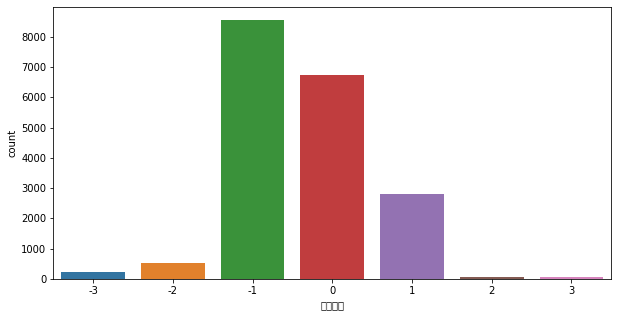

In [169]:
# Visualize the proportion of each target class

plt.figure(figsize=(10,5))
sns.countplot(y_train)

In [0]:
# Calculate class weight

# Let's import the module first
from sklearn.utils import class_weight

# In order to calculate the class weight do the following
class_weights = class_weight.compute_class_weight(class_weight = 'balanced', classes = np.unique(y_train), y = y_train)

In [0]:
enc = OneHotEncoder(sparse=False)

In [0]:
y_train = enc.fit_transform(np.asarray(y_train).reshape(-1, 1))

In [173]:
y_train.shape

(18962, 7)

In [0]:
y_test = enc.transform(np.asarray(y_test).reshape(-1, 1))

## Model 1 : Predict 7 classes:

25000 features

30 epochs

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 15169 samples, validate on 3793 samples
Epoch 1/10
15169/15169 [==============================] - 25s 2ms/step - loss: 1.3108 - accuracy: 0.5858 - val_loss: 0.8794 - val_accuracy: 0.6839
Epoch 2/10
15169/15169 [==============================] - 25s 2ms/step - loss: 0.7151 - accuracy: 0.7319 - val_loss: 0.5959 - val_accuracy: 0.7569
Epoch 3/10
15169/15169 [==============================] - 25s 2ms/step - loss: 0.4359 - accuracy: 0.8496 - val_loss: 0.4635 - val_accuracy: 0.8365
Epoch 4/10
15169/15169 [==============================] - 25s 2ms/step - loss: 0.3134 - accuracy: 0.8898 - val_loss: 0.4653 - val_accuracy: 0.8447
Epoch 5/10
15169/15169 [==============================] - 25s 2ms/step - loss: 0.2336 - accuracy: 0.9196 - val_loss: 0.5158 - val_accuracy: 0.8458
Epoch 6/10
15169/15169 [==============================] - 25s 2ms/step - loss: 0.1737 - accuracy: 0.9436 - val_loss: 0.5592 - val_accuracy: 0.8344
Epoch 7/10
15169/15169 [==============================] - 24s 2ms/ste

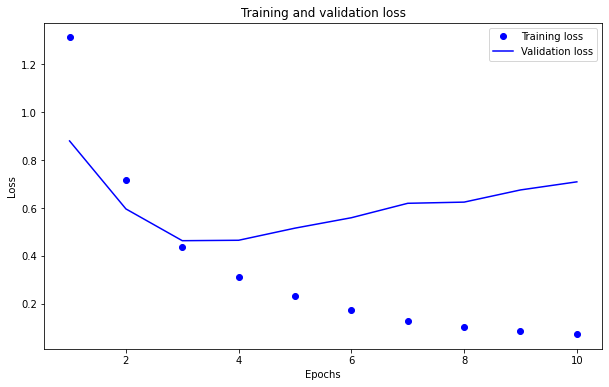

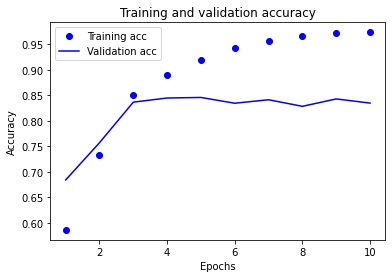

In [175]:
# Build our neural network model with LSTM

from keras import models
from keras import layers

max_features = 25000

from keras.layers import LSTM
model = models.Sequential()
model.add(layers.Embedding(max_features, 100)) 
model.add(layers.LSTM(128))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(7, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Iterate on your training data by calling the fit() method of your model
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=500,
                   validation_split=0.2,
                    class_weight = class_weights)

# plot the results of loss values from the training set and validtion set
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.figure(figsize=(10,6))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# plot the results of accuracy from the training set and validtion set
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [176]:
results = model.evaluate(X_test, y_test)
print(results)

4741/4741 [==============================] - 9s 2ms/step
[0.7158177247959661, 0.8396962881088257]


In [0]:
preds_Y = model.predict(X_test)
preds_Y=(preds_Y>0.5).astype(int)

In [0]:
preds_Y = enc.inverse_transform(preds_Y)

In [0]:
y_test = enc.inverse_transform(y_test)

In [180]:
accuracy = accuracy_score(y_test, preds_Y)
c_matrix = confusion_matrix(y_test, preds_Y,labels=[3,2,1,0,-1,-2,-3])
print('accuracy: '+str(accuracy)+'\n')
print('Confusion matrix: ')
print(c_matrix)

accuracy: 0.8356886732756802

Confusion matrix: 
[[   7    0    0    0    0    0    6]
 [   0    0    2    3    1    6    6]
 [   0    0  485  183   28   14   14]
 [   0    0  132 1380   95   20   26]
 [   0    0   40  118 1974   14   18]
 [   0    0    2   12   11   75   15]
 [   0    0    0    2    3    8   41]]


In [185]:
Recall = recall_score(y_test, preds_Y,average=None)
print(Recall)

[0.75925926 0.65217391 0.91219963 0.83484574 0.6698895  0.
 0.53846154]


# 預測大事件類別

dropout 0.2
recurrent dropout 0.2
testing dataset accuracy: 96%

In [0]:
y = np.asarray(data_df["大事件類別"])

y = np.asarray(pd.get_dummies(y))

# Split data to training data and testing data 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [0]:
y = data_df["大事件類別"]

In [0]:
# Split data to training data and testing data 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [159]:
y_train.value_counts()

I_產業前景       12111
M_經營層         4856
F_市場交易        1176
R_危機           410
A_會計/財報分析      409
Name: 大事件類別, dtype: int64

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 29986 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26989 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21069 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26223 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 32147 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 29151 missing from current font.
  font.set_

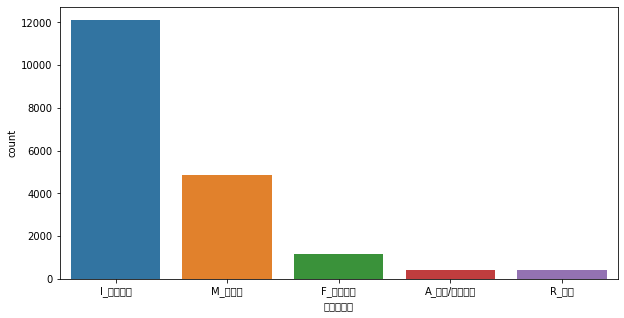

In [160]:
# Visualize the proportion of each target class

plt.figure(figsize=(10,5))
sns.countplot(y_train)

In [0]:
# Calculate class weight

# Let's import the module first
from sklearn.utils import class_weight

# In order to calculate the class weight do the following
class_weights = class_weight.compute_class_weight(class_weight = 'balanced', classes = np.unique(y_train), y = y_train)

In [0]:
# Convert dataframes to numpy arrays

y_train = np.asarray(pd.get_dummies(y_train))
y_test = np.asarray(pd.get_dummies(y_test))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 15169 samples, validate on 3793 samples
Epoch 1/30
15169/15169 [==============================] - 29s 2ms/step - loss: 0.9881 - accuracy: 0.7630 - val_loss: 0.4615 - val_accuracy: 0.8634
Epoch 2/30
15169/15169 [==============================] - 29s 2ms/step - loss: 0.3685 - accuracy: 0.8830 - val_loss: 0.2778 - val_accuracy: 0.9196
Epoch 3/30
15169/15169 [==============================] - 28s 2ms/step - loss: 0.2170 - accuracy: 0.9332 - val_loss: 0.2051 - val_accuracy: 0.9328
Epoch 4/30
15169/15169 [==============================] - 29s 2ms/step - loss: 0.1483 - accuracy: 0.9527 - val_loss: 0.1801 - val_accuracy: 0.9444
Epoch 5/30
15169/15169 [==============================] - 29s 2ms/step - loss: 0.1102 - accuracy: 0.9653 - val_loss: 0.1643 - val_accuracy: 0.9547
Epoch 6/30
15169/15169 [==============================] - 29s 2ms/step - loss: 0.0841 - accuracy: 0.9779 - val_loss: 0.1548 - val_accuracy: 0.9562
Epoch 7/30
15169/15169 [==============================] - 29s 2ms/ste

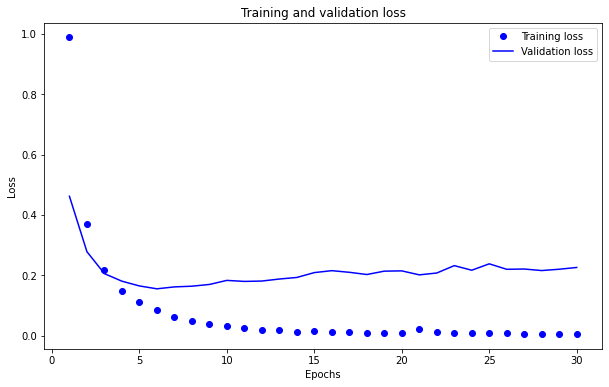

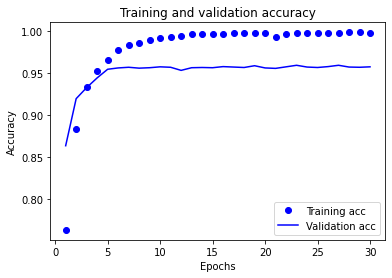

In [163]:
# Build our neural network model with LSTM: 128 units

from keras import models
from keras import layers

max_features = 25000

from keras.layers import LSTM
model = models.Sequential()
model.add(layers.Embedding(max_features, 100)) 
model.add(layers.LSTM(128,dropout=0.2, recurrent_dropout=0.2)) # Note we use "dropout" technique here.
model.add(layers.Dense(5, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Iterate on your training data by calling the fit() method of your model
history = model.fit(X_train, y_train,
                    epochs=30,
                    batch_size=500,
                   validation_split=0.2,
                    class_weight = class_weights)

# plot the results of loss values from the training set and validtion set
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.figure(figsize=(10,6))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# plot the results of accuracy from the training set and validtion set
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [164]:
results = model.evaluate(X_test, y_test)
print(results)

4741/4741 [==============================] - 10s 2ms/step
[0.19223396192998518, 0.9641425609588623]


# 預測小事件類別

dropout 0.2
recurrent dropout 0.2
testing dataset accuracy: 83%

In [0]:
y = data_df["小事件類別"]

In [0]:
# Split data to training data and testing data 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [59]:
y_train.value_counts()

IS01_營收變動或客戶/商品/通路策略    7645
MT02_董監異動               1618
MT06_高管異動               1533
IP01_成本/產能變動或資本支出       1515
IF02_投資/併購/組織策略         1373
                        ... 
MF02_股權快速稀釋                1
4D_客戶及產品－暴險                1
MO03_董監持股未達規定比例            1
RB11_銀行續貸考量                1
MO07_董監財務危機                1
Name: 小事件類別, Length: 97, dtype: int64

In [0]:
# Visualize the proportion of each target class

plt.figure(figsize=(10,5))
sns.countplot(y_train)

In [0]:
# Calculate class weight

# Let's import the module first
from sklearn.utils import class_weight

# In order to calculate the class weight do the following
class_weights = class_weight.compute_class_weight(class_weight = 'balanced', classes = np.unique(y_train), y = y_train)

In [0]:
# Convert dataframes to numpy arrays

y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

In [0]:
# One hot encoder
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()

enc.fit(np.asarray(y).reshape(-1, 1))
y_train = enc.transform(y_train.reshape(-1, 1))
y_test = enc.transform(y_test.reshape(-1, 1))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 15169 samples, validate on 3793 samples
Epoch 1/30
15169/15169 [==============================] - 9s 573us/step - loss: 4.2863 - accuracy: 0.4420 - val_loss: 3.5120 - val_accuracy: 0.4057
Epoch 2/30
15169/15169 [==============================] - 8s 554us/step - loss: 2.8486 - accuracy: 0.4025 - val_loss: 2.3863 - val_accuracy: 0.4057
Epoch 3/30
15169/15169 [==============================] - 8s 546us/step - loss: 2.2431 - accuracy: 0.4235 - val_loss: 2.1422 - val_accuracy: 0.4830
Epoch 4/30
15169/15169 [==============================] - 9s 563us/step - loss: 2.0163 - accuracy: 0.4868 - val_loss: 1.9313 - val_accuracy: 0.5228
Epoch 5/30
15169/15169 [==============================] - 8s 547us/step - loss: 1.7861 - accuracy: 0.5598 - val_loss: 1.7184 - val_accuracy: 0.5653
Epoch 6/30
15169/15169 [==============================] - 8s 539us/step - loss: 1.5547 - accuracy: 0.6008 - val_loss: 1.4949 - val_accuracy: 0.6660
Epoch 7/30
15169/15169 [==============================] - 8s 53

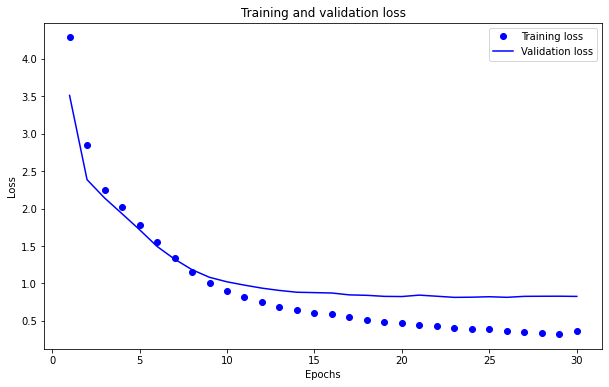

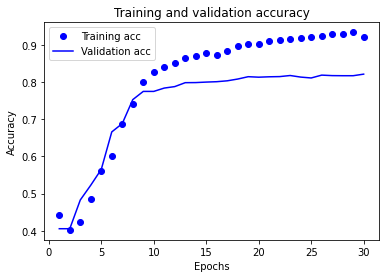

In [33]:
# Build our neural network model with LSTM
# LSTM: 32 units

from keras import models
from keras import layers

max_features = 25000

from keras.layers import LSTM
model = models.Sequential()
model.add(layers.Embedding(max_features, 100)) 
model.add(layers.LSTM(32,dropout=0, recurrent_dropout=0))
model.add(layers.Dense(99, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Iterate on your training data by calling the fit() method of your model
history = model.fit(X_train, y_train,
                    epochs=30,
                    batch_size=500,
                   validation_split=0.2,
                    class_weight = class_weights)

# plot the results of loss values from the training set and validtion set
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.figure(figsize=(10,6))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# plot the results of accuracy from the training set and validtion set
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [34]:
results = model.evaluate(X_test, y_test)
print(results)

4741/4741 [==============================] - 3s 699us/step
[0.7505124059439561, 0.8329466581344604]


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 15169 samples, validate on 3793 samples
Epoch 1/30
15169/15169 [==============================] - 8s 553us/step - loss: 3.8423 - accuracy: 0.4370 - val_loss: 2.6106 - val_accuracy: 0.4057
Epoch 2/30
15169/15169 [==============================] - 8s 540us/step - loss: 2.1877 - accuracy: 0.4572 - val_loss: 1.8956 - val_accuracy: 0.5581
Epoch 3/30
15169/15169 [==============================] - 8s 524us/step - loss: 1.7867 - accuracy: 0.5909 - val_loss: 1.6900 - val_accuracy: 0.6512
Epoch 4/30
15169/15169 [==============================] - 8s 536us/step - loss: 1.5577 - accuracy: 0.6801 - val_loss: 1.4878 - val_accuracy: 0.6778
Epoch 5/30
15169/15169 [==============================] - 8s 516us/step - loss: 1.3277 - accuracy: 0.7059 - val_loss: 1.2708 - val_accuracy: 0.7182
Epoch 6/30
15169/15169 [==============================] - 8s 534us/step - loss: 1.1492 - accuracy: 0.7488 - val_loss: 1.1363 - val_accuracy: 0.7506
Epoch 7/30
15169/15169 [==============================] - 8s 52

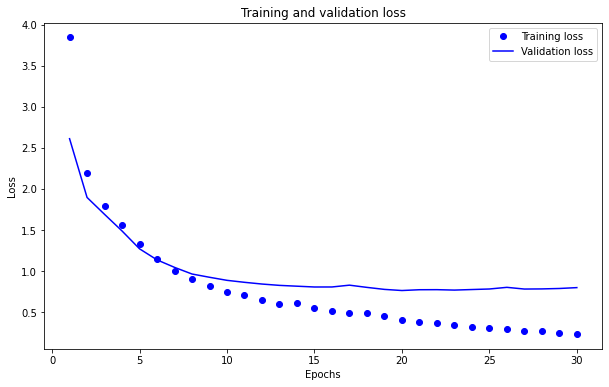

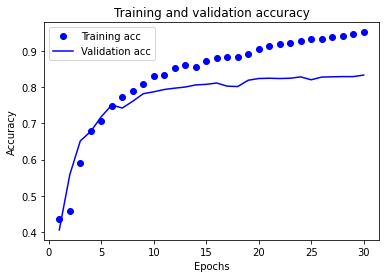

In [35]:
# Build our neural network model with LSTM
# LSTM: 64 units

from keras import models
from keras import layers

max_features = 25000

from keras.layers import LSTM
model = models.Sequential()
model.add(layers.Embedding(max_features, 100)) 
model.add(layers.LSTM(64,dropout=0, recurrent_dropout=0))
model.add(layers.Dense(99, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Iterate on your training data by calling the fit() method of your model
history = model.fit(X_train, y_train,
                    epochs=30,
                    batch_size=500,
                   validation_split=0.2,
                    class_weight = class_weights)

# plot the results of loss values from the training set and validtion set
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.figure(figsize=(10,6))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# plot the results of accuracy from the training set and validtion set
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [36]:
results = model.evaluate(X_test, y_test)
print(results)

4741/4741 [==============================] - 3s 686us/step
[0.7260332090697241, 0.8401181101799011]


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 15169 samples, validate on 3793 samples
Epoch 1/30
15169/15169 [==============================] - 16s 1ms/step - loss: 3.5010 - accuracy: 0.3882 - val_loss: 2.5488 - val_accuracy: 0.4057
Epoch 2/30
15169/15169 [==============================] - 16s 1ms/step - loss: 2.4714 - accuracy: 0.4025 - val_loss: 2.4556 - val_accuracy: 0.4057
Epoch 3/30
15169/15169 [==============================] - 15s 1ms/step - loss: 2.3831 - accuracy: 0.4025 - val_loss: 2.2684 - val_accuracy: 0.4057
Epoch 4/30
15169/15169 [==============================] - 15s 1ms/step - loss: 2.0690 - accuracy: 0.4500 - val_loss: 1.9341 - val_accuracy: 0.5175
Epoch 5/30
15169/15169 [==============================] - 16s 1ms/step - loss: 1.8127 - accuracy: 0.5695 - val_loss: 1.7511 - val_accuracy: 0.5845
Epoch 6/30
15169/15169 [==============================] - 16s 1ms/step - loss: 1.6187 - accuracy: 0.6086 - val_loss: 1.5908 - val_accuracy: 0.6032
Epoch 7/30
15169/15169 [==============================] - 16s 1ms/ste

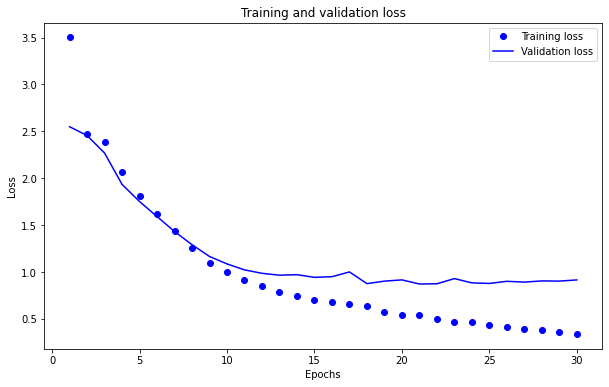

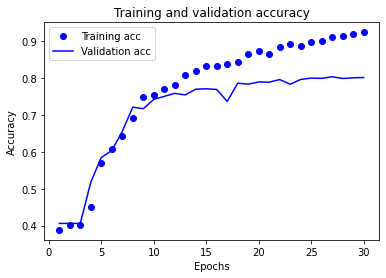

In [64]:
# Build our neural network model with LSTM
# LSTM: 64 units
# 2 LSTM layers

from keras import models
from keras import layers

max_features = 25000

from keras.layers import LSTM
model = models.Sequential()
model.add(layers.Embedding(max_features, 100)) 
model.add(layers.LSTM(64,dropout=0, recurrent_dropout=0,return_sequences=True))
model.add(layers.LSTM(64,dropout=0, recurrent_dropout=0,return_sequences=False))
model.add(layers.Dense(99, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Iterate on your training data by calling the fit() method of your model
history = model.fit(X_train, y_train,
                    epochs=30,
                    batch_size=500,
                   validation_split=0.2,
                    class_weight = class_weights)

# plot the results of loss values from the training set and validtion set
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.figure(figsize=(10,6))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# plot the results of accuracy from the training set and validtion set
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [65]:
results = model.evaluate(X_test, y_test)
print(results)

4741/4741 [==============================] - 6s 1ms/step
[0.8159510052121156, 0.8164944052696228]


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 15169 samples, validate on 3793 samples
Epoch 1/30
15169/15169 [==============================] - 8s 541us/step - loss: 3.4708 - accuracy: 0.3934 - val_loss: 2.4532 - val_accuracy: 0.4057
Epoch 2/30
15169/15169 [==============================] - 8s 502us/step - loss: 2.1427 - accuracy: 0.4638 - val_loss: 1.7148 - val_accuracy: 0.6288
Epoch 3/30
15169/15169 [==============================] - 8s 524us/step - loss: 1.5321 - accuracy: 0.6405 - val_loss: 1.3931 - val_accuracy: 0.6813
Epoch 4/30
15169/15169 [==============================] - 8s 518us/step - loss: 1.1446 - accuracy: 0.7376 - val_loss: 1.1041 - val_accuracy: 0.7263
Epoch 5/30
15169/15169 [==============================] - 8s 511us/step - loss: 0.9462 - accuracy: 0.7713 - val_loss: 0.9626 - val_accuracy: 0.7619
Epoch 6/30
15169/15169 [==============================] - 8s 507us/step - loss: 0.8324 - accuracy: 0.7939 - val_loss: 0.9102 - val_accuracy: 0.7654
Epoch 7/30
15169/15169 [==============================] - 8s 51

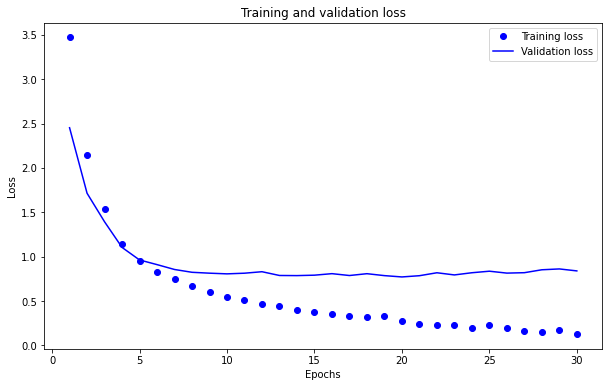

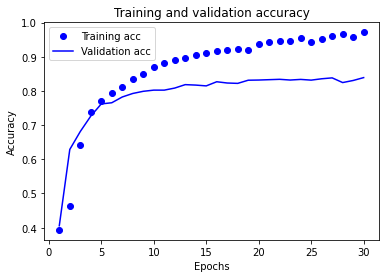

In [37]:
# Build our neural network model with LSTM
# LSTM: 128 units

from keras import models
from keras import layers

max_features = 25000

from keras.layers import LSTM
model = models.Sequential()
model.add(layers.Embedding(max_features, 100)) 
model.add(layers.LSTM(128,dropout=0, recurrent_dropout=0))
model.add(layers.Dense(99, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Iterate on your training data by calling the fit() method of your model
history = model.fit(X_train, y_train,
                    epochs=30,
                    batch_size=500,
                   validation_split=0.2,
                    class_weight = class_weights)

# plot the results of loss values from the training set and validtion set
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.figure(figsize=(10,6))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# plot the results of accuracy from the training set and validtion set
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [38]:
results = model.evaluate(X_test, y_test)
print(results)

4741/4741 [==============================] - 3s 673us/step
[0.73826328301211, 0.8546720147132874]
